# **Tutorial 5: Clustering**

## Background on Clustering and K-Means
Clustering is an **unsupervised** learning approach in which we seek to group our data into clusters based on similarity.

##### Pseudocode
Inputs: N data points, Number of clusters (K)

Output: A grouping of the N data points into K clusters

1. Initialize the centroids $c_1, c_2, ..., c_K$. This can be done in various ways (e.g., random selection, $K$-medoids, $K$-Means++).
2. Repeat until convergence or a fixed number of iterations is reached:
    - Assign each data point $x_i$ to the cluster represented by the nearest centroid $c_j$ 
    - Update the centroids of all clusters:
        - $c_j$ = mean of all points assigned to cluster $j$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load and Visualize Data

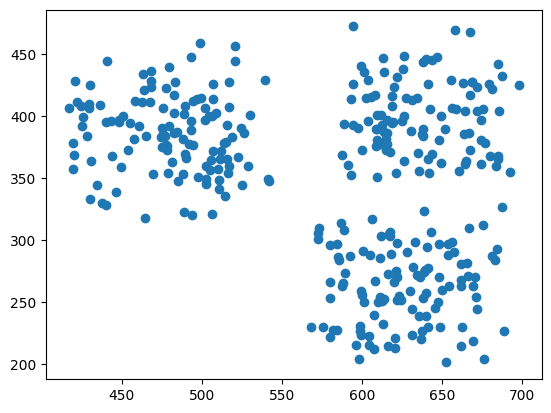

In [2]:
df = pd.read_csv('clustering_data.csv')
plt.scatter(df['x'], df['y'])

## Use Pre-Implemented `KMeans` Method in Scikit-Learn to cluster data

/home/sean_the_sheep/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


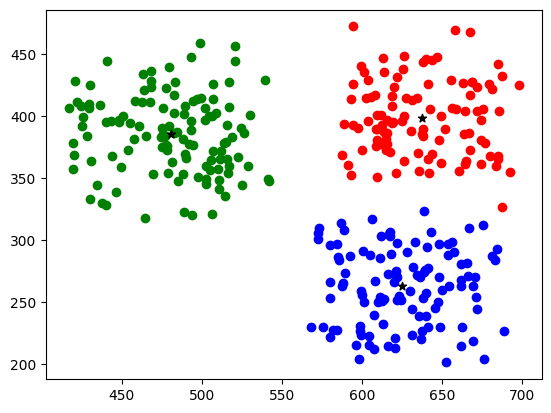

In [3]:
method = KMeans(n_clusters=3) # Set n_clusters to the most obvious number of clusters (i.e., 3).
method.fit(df)
labels = method.predict(df)

df['labels']= labels
d0 = df[df['labels']== 0]
d1 = df[df['labels']== 1]
d2 = df[df['labels']== 2]
 
plt.scatter(d0['x'], d0['y'], c ='r')
plt.scatter(d1['x'], d1['y'], c ='g')
plt.scatter(d2['x'], d2['y'], c ='b')

plt.scatter(method.cluster_centers_[:,0], method.cluster_centers_[:,1], marker='*', color='black') # centroids are plotted as black stars

## "Elbow" Method
**Problem:** What if the number of clusters was not obvious? How would we initialize the number of centroids?
**Solution:** We can calculate the **Within-Cluster Sum of Squares (WCSS)** for every number of clusters we would like to examine. Then, we could plot these WCSS values. The number of clusters at which the plot starts to plateau (looks like an "elbow") is the optimal number of clusters according to this metric. We define WCSS as follows:

$WCSS = \sum_{C_k}^{C_n} \sum_{d_i \text{ in } C_k}^{d_m} \text{distance}(d_i, C_k)^2$, where $C_k$ is the $i^{\text{th}}$ centroid and $d_i$ is $i^{\text{th}}$ data point in the centroid $C_k$.

In the `KMeans` class within Scikit-Learn, the attribute `inertia_` stores the WCSS.

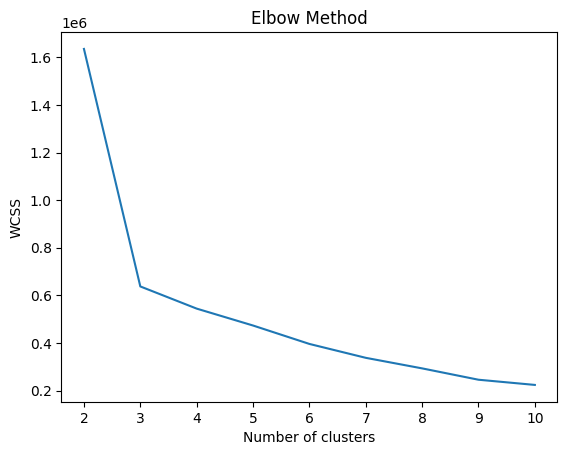

In [4]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We notice that the "elbow" occurs when the number of clusters is 3, as expected.

# **Exercise**: Implement K-Means from Scratch

To initialize your centroids, simply use random initialization. For this, you may use `np.random.choice` (refer to documentation for more information: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).

In [6]:
def kmeans(df, k):
  '''
  Inputs: df is a DataFrame containing the data points with two columns ('x' and 'y').
          k is the number of clusters.
  Outputs: centroids, an array of all centroid locations
           cluster, an array whose ith entry corresponds to the cluster assigned to the ith data point
  '''
  X = np.array(df[['x', 'y']])

  diff = 1
  cluster = np.zeros(X.shape[0])


  # randomly initialize k centroids
  random_indices = [15, 100, 150]
  centroids = X[random_indices, :]

  while diff:

    # Update cluster labels
    # This is the analog of what was shown in LEC, w/ some LinAlg/numpy shenanigans.
    # Most of the one-liners below were once three-liners. I've cleaned em up since then, however.
    cluster = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

    # Update centroid locations
    new_centroids = np.array([X[cluster == i].mean(axis=0) for i in range(k)])

    # Check for convergence
    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids
    
    
  return centroids, cluster  

Test your implementation below. Check whether the output of your function agrees with Scikit-Learn's output above.

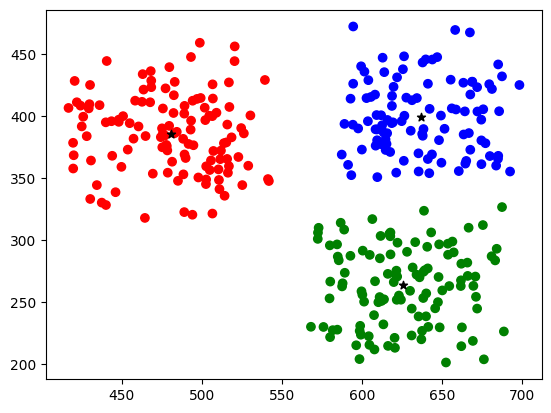

In [16]:
centroids, cluster = kmeans(df, 3)

colour_dict = {0: 'b', 1: 'r', 2: 'g'}
colours = [colour_dict[c] for c in cluster]
plt.scatter(df['x'], df['y'], color=colours)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='black')